Using the lifetimes library to model the BG/NBD customer behaviour.

In [1]:
# load the same dataset from before
import sys
sys.path.append("../")
from customercentric import dataprocessing
df = dataprocessing.read_cdwow('../data/cdwow/CDNOW_master.txt')
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from lifetimes.utils import summary_data_from_transaction_data

summary = summary_data_from_transaction_data(df, "id", "date")

summary.head()

,frequency,recency,T
id,,,
1,0.0,0.0,545.0
2,0.0,0.0,534.0
3,5.0,511.0,544.0
4,3.0,345.0,545.0
5,10.0,367.0,545.0


`frequency` represents the number of _repeat_ purchases that a customer has made. It is one less than the number of unique time periods that we saw them on.

`T` represents the age of the customer in whatever time units chosen. Duration between a customer's first purchase and the end of the period under study.

`recency` is the age of the customer when they made their most recent purchase. Bigger numbers mean that we've seen them as an older customer. If they've made only one purchase then the recency will be zero.

In [3]:
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.01)
bgf.fit(summary["frequency"], summary["recency"], summary["T"])

print(bgf)

<lifetimes.BetaGeoFitter: fitted with 23570 subjects, a: 0.23, alpha: 41.74, b: 0.73, r: 0.27>


We can make an estimate for the probability that an artificial customer will make in the next time period.
This is an estimate of how good a customer there is.

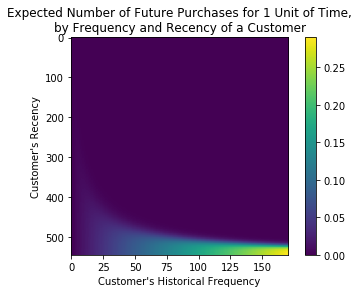

In [4]:
%matplotlib inline
from lifetimes.plotting import plot_frequency_recency_matrix

plot_frequency_recency_matrix(bgf)

The best customers are ones that we've seen very often in the past -- highest frequency.
But these customers will drop off quite quickly.
If their recency is lower (we haven't seen them for a few time periods), then we realise that they have likely churned.
On the other hand, customers that we've seen less often are less dependent on seeing every day to say that they've churned.
That's why there is a big tail to this distribution for lower frequency users.

Another interesting matrix to look at is the probability of still being alive:

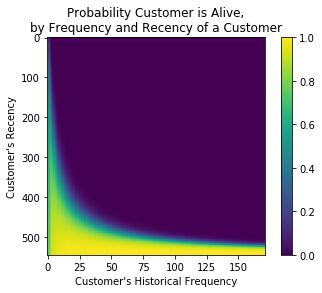

In [5]:
from lifetimes.plotting import plot_probability_alive_matrix

plot_probability_alive_matrix(bgf)


In [6]:
from lifetimes.plotting import plot_history_alive


In [7]:
interesting_ids = [
    5,
    11630,
    16914,
    2864,
    6999,
    21779,
    758,
    15750
]

5


/home/ewann/dev/customer-centric-ds/venv/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


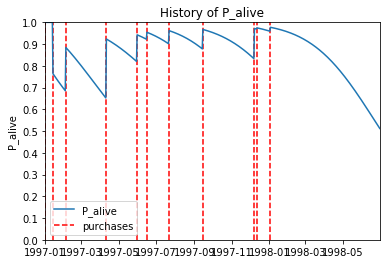

In [8]:
id = np.random.choice(interesting_ids)
print(id)
trans = df.loc[df.id == id]

days_since_birth = (df.date.max() - trans.date.min()).days

ax = plot_history_alive(bgf, days_since_birth, trans, "date")